*   The Fashion MNIST database has a database of fashion accessories.

*   Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747, 2017.

*   The training set has  60,000  samples. The test set has  10,000  samples.

*   The fashion accessories are size-normalized and centered in a fixed-size image.

*   We will train Multi-layer Perceptron using Keras for Fashion MNIST dataset.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


** Visualize the data**

In [3]:
img_rows, img_cols =28,28

In [4]:
# MLP
X_train_mlp = X_train.reshape(X_train.shape[0], img_rows*img_cols)
Y_train_mlp_1 = Y_train

X_test_mlp = X_test.reshape(X_test.shape[0], img_rows*img_cols)
Y_test_mlp_1 = Y_test
print(Y_train.shape)
print(Y_test.shape)

(60000,)
(10000,)


X_train shape: (60000, 28, 28) Y_train shape: (60000,)
Y = 2 Pullover


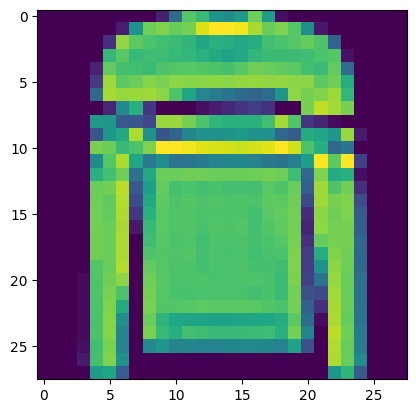

In [6]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)

# Define the labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5

# y_train contains the lables, ranging from 0 to 9
label_index = Y_train[img_index]

# Print the label, for example 2 Pullover
print ("Y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# # Show one of the images from the training dataset
plt.imshow(X_train[img_index])

In [7]:
print(X_train_mlp.shape)

(60000, 784)


In [8]:
X_train_mlp = X_train_mlp.astype('float32')
X_test_mlp = X_test_mlp.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

In [9]:
# Convert class vectors to binary class matrices
num_classes = 10

Y_train_mlp = keras.utils.to_categorical(Y_train_mlp_1, num_classes)

Y_test_mlp = keras.utils.to_categorical(Y_test_mlp_1,num_classes )

In [10]:
Y_train_mlp[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
# Split data to optimize classifier during training
X_train_mlp, X_val_mlp, Y_train_mlp, Y_val_mlp = train_test_split(X_train_mlp,
                                                                  Y_train_mlp,
                                                                  test_size=0.2)

In [12]:
print(X_train_mlp.shape)
print(X_val_mlp.shape)

(48000, 784)
(12000, 784)


#**Multi Layer Perceptron**

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

In [14]:
batch_size = 256
num_epochs = 50

In [15]:
# Multilayer Perceptron model

model = Sequential()

model.add(Dense(input_dim=784, activation='sigmoid', units=625, kernel_initializer='normal'))

model.add(Dense(input_dim=625, activation='softmax', units=10, kernel_initializer='normal'))

model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 625)               490625    
                                                                 
 dense_1 (Dense)             (None, 10)                6260      
                                                                 
Total params: 496,885
Trainable params: 496,885
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
history = model.fit(X_train_mlp,Y_train_mlp,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val_mlp,Y_val_mlp))

Epoch 1/50
188/188 [==============================] - 4s 5ms/step - loss: 1.3913 - accuracy: 0.6219 - val_loss: 0.9931 - val_accuracy: 0.6921
Epoch 2/50
188/188 [==============================] - 1s 4ms/step - loss: 0.8623 - accuracy: 0.7342 - val_loss: 0.7900 - val_accuracy: 0.7418
Epoch 3/50
188/188 [==============================] - 1s 4ms/step - loss: 0.7360 - accuracy: 0.7546 - val_loss: 0.7080 - val_accuracy: 0.7518
Epoch 4/50
188/188 [==============================] - 1s 4ms/step - loss: 0.6743 - accuracy: 0.7680 - val_loss: 0.6542 - val_accuracy: 0.7714
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.6345 - accuracy: 0.7812 - val_loss: 0.6209 - val_accuracy: 0.7807
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.6066 - accuracy: 0.7897 - val_loss: 0.5982 - val_accuracy: 0.7886
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.5844 - accuracy: 0.7972 - val_loss: 0.5814 - val_accuracy: 0.7938
Epoch 

In [17]:
score = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4505 - accuracy: 0.8376

MLP Test loss: 0.450467586517334
MLP Test accuracy: 0.8375999927520752


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

In [19]:
# Deep Multilayer Perceptron model
model_deepmlp = Sequential()

model_deepmlp.add(Dense(input_dim=784, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('relu'))
model_deepmlp.add(Dropout(0.2))

model_deepmlp.add(Dense(input_dim=625, units=625, kernel_initializer='normal'))
model_deepmlp.add(Activation('softmax'))

model_deepmlp.compile(optimizer=RMSprop(lr=0.001, rho=0.9),
              loss='categorical_crossentropy', metrics=['accuracy'])

model_deepmlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 625)               490625    
                                                                 
 activation (Activation)     (None, 625)               0         
                                                                 
 dropout (Dropout)           (None, 625)               0         
                                                                 
 dense_3 (Dense)             (None, 625)               391250    
                                                                 
 activation_1 (Activation)   (None, 625)               0         
                                                                 
 dropout_1 (Dropout)         (None, 625)               0         
                                                                 
 dense_4 (Dense)             (None, 625)              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history_deepmlp = model.fit(X_train_mlp,Y_train_mlp,
          batch_size = batch_size,
          epochs = num_epochs,
          verbose = 1,
          validation_data = (X_val_mlp,Y_val_mlp))

Epoch 1/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8552 - val_loss: 0.4185 - val_accuracy: 0.8522
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4113 - accuracy: 0.8558 - val_loss: 0.4179 - val_accuracy: 0.8533
Epoch 3/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4106 - accuracy: 0.8564 - val_loss: 0.4182 - val_accuracy: 0.8530
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4094 - accuracy: 0.8569 - val_loss: 0.4205 - val_accuracy: 0.8516
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.8569 - val_loss: 0.4157 - val_accuracy: 0.8534
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4075 - accuracy: 0.8573 - val_loss: 0.4124 - val_accuracy: 0.8555
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.4061 - accuracy: 0.8576 - val_loss: 0.4151 - val_accuracy: 0.8537
Epoch 

In [21]:
score = model.evaluate(X_test_mlp, Y_test_mlp, verbose = 1)
print()
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8482

MLP Test loss: 0.418639212846756
MLP Test accuracy: 0.8482000231742859
